In [12]:
# Dependencies
import pandas as pd
import nfl_data_py as nfl
import matplotlib.pyplot as plt
import os
import urllib.request

In [ ]:
# Define the matchup parameters
year = 2022
week = '01'
away_team = 'BUF'
home_team = 'LA'

In [104]:
# <!--------------PUT THIS IN A FUNCTION AND IMPORT, SOLVE "no logo_df found" error-------------!>

# Pull the team description
logos = nfl.import_team_desc()

# Keep only the necessary columns in the logos DataFrame
logos = logos[['team_abbr', 'team_logo_espn', 'team_color']]

# Initialize an empty list for the logo file paths
logo_paths = []

# Initialize an empty list for the team abbreviations
team_abbr = []

# Initialize an empty list for the team colors
team_color = []

# Create a folder for the image files if it doesn't exist
if not os.path.exists("logos"):
    os.makedirs("logos")

# Pull the team logos from the URL and save them in the logos folder, save the file paths to
for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])
    team_color.append(logos['team_color'][team])


# Create a dictionary to put logo_paths and team_abbr in
data = {'team_abbr': team_abbr, 'logo_path': logo_paths, 'team_color': team_color}

# Create a DataFrame from the dictionary
logo_df = pd.DataFrame(data)

In [105]:
# Load the NFL 2022 PBP data
pbp_df = nfl.import_pbp_data([year])

2022 done.
Downcasting floats.


In [106]:
pbp_df

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,n_offense,defense_players,n_defense
0,1.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,BUF,away,LA,...,None,None,NaN,None,NaN,,,0,,0
1,41.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,BUF,away,LA,...,None,None,NaN,None,NaN,52512;42818;48482;52835;48772;54696;48011;5284...,00-0036421;00-0035933;00-0035609;00-0035942;00...,11,00-0031787;00-0035352;00-0037318;00-0035308;00...,11
2,56.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,BUF,away,LA,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",4.0,42816;48512;43298;47844;43335;47879;44875;4791...,00-0035382;00-0035689;00-0033904;00-0027648;00...,11,00-0031785;00-0033072;00-0035663;00-0032889;00...,11
3,80.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,BUF,away,LA,...,EMPTY,"1 RB, 1 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",NaN,42816;48512;43298;47844;43335;47879;44875;4791...,00-0035382;00-0035689;00-0033904;00-0027648;00...,11,00-0031785;00-0033072;00-0035663;00-0032889;00...,11
4,101.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,BUF,away,LA,...,I_FORM,"2 RB, 1 TE, 2 WR",6.0,"3 DL, 3 LB, 5 DB",NaN,42816;48512;42818;43298;47939;47844;43335;4787...,00-0035382;00-0031787;00-0035689;00-0033904;00...,11,00-0031785;00-0033072;00-0035591;00-0035663;00...,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,3657.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,0,,0
158,3674.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,LA,home,BUF,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",4.0,42400;46180;46085;43399;46376;53641;41290;4785...,00-0032242;00-0034804;00-0033110;00-0034114;00...,11,00-0034673;00-0036888;00-0036192;00-0034391;00...,11
159,3696.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,LA,home,BUF,...,SHOTGUN,"1 RB, 1 TE, 3 WR",4.0,"4 DL, 2 LB, 5 DB",4.0,42400;48482;46180;43399;46376;53641;41290;4785...,00-0032242;00-0034804;00-0033110;00-0034114;00...,11,00-0035352;00-0036888;00-0036192;00-0034391;00...,11
160,3718.0,2022_01_BUF_LA,2022090800,LA,BUF,REG,1,BUF,away,LA,...,None,"2 RB, 2 TE, 1 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,48512;42816;48770;42818;47939;52835;47844;4787...,00-0035382;00-0031787;00-0035689;00-0031622;00...,11,00-0031785;00-0035607;00-0035591;00-0035933;00...,11


In [107]:
# Filter down to a single game (Week 1: Rams vs. Bills)
pbp_df = pbp_df[pbp_df['game_id'] == f'{year}_{week}_{away_team}_{home_team}']

# Filter down to necessary columns
pbp_df = pbp_df[['posteam', 'game_seconds_remaining', 'away_wp', 'home_wp']]

# Rename posteam to team_abbr
pbp_df = pbp_df.rename(columns={'posteam':'team_abbr'})

In [108]:
# Join logo_df on pbp_df to get colors and logos
vis_df = pd.merge(pbp_df, logo_df)
vis_df

,team_abbr,game_seconds_remaining,away_wp,home_wp,logo_path,team_color
0,BUF,3600.0,0.433208,0.566792,logos/BUF.tif,#00338D
1,BUF,3600.0,0.433208,0.566792,logos/BUF.tif,#00338D
2,BUF,3600.0,0.433208,0.566792,logos/BUF.tif,#00338D
3,BUF,3569.0,0.425650,0.574350,logos/BUF.tif,#00338D
4,BUF,3534.0,0.454899,0.545101,logos/BUF.tif,#00338D
...,...,...,...,...,...,...
147,LA,136.0,0.998878,0.001122,logos/LA.tif,#003594
148,LA,120.0,0.997470,0.002530,logos/LA.tif,#003594
149,LA,75.0,0.998688,0.001312,logos/LA.tif,#003594
150,LA,51.0,0.998777,0.001223,logos/LA.tif,#003594


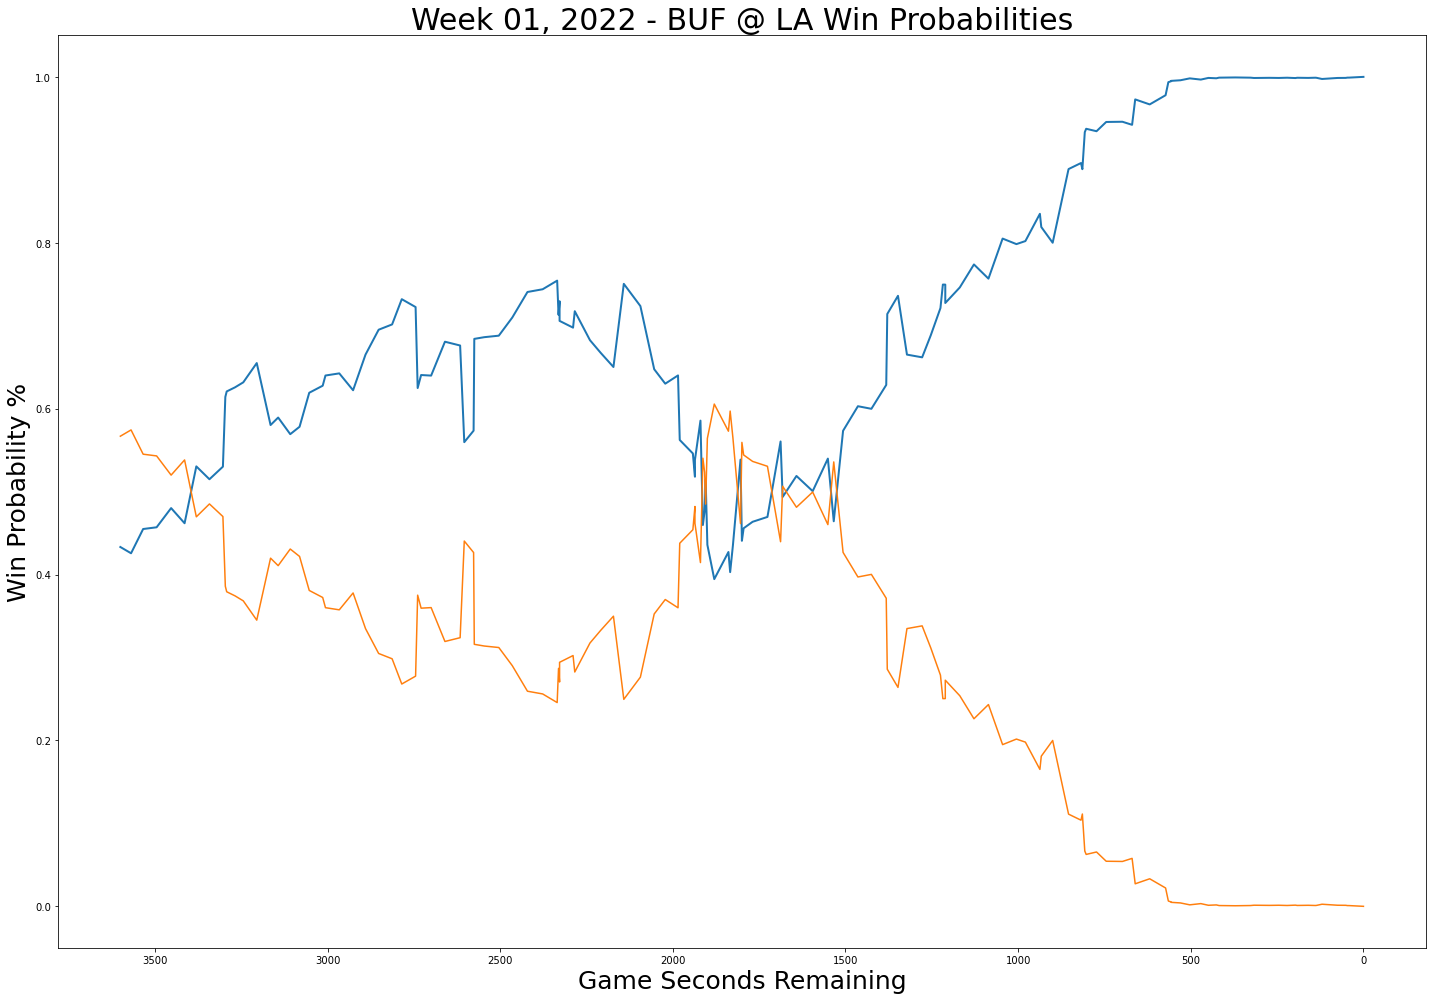

In [109]:
# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [20, 14]
plt.rcParams["figure.autolayout"] = True

# Define the subplot
fig, ax = plt.subplots()

# Plot the data on the subplots
ax.plot(pbp_df ['game_seconds_remaining'], pbp_df['away_wp'], color= , label=away_team, linewidth=2)
ax.plot(pbp_df['game_seconds_remaining'], pbp_df['home_wp'])

# Invert the x-axis so that it ends when there are 0 second remaining
ax.invert_xaxis()

# Chart parameters
plt.title(f'Week {week}, {year} - {away_team} @ {home_team} Win Probabilities', fontdict={'fontsize':30});
plt.xlabel("Game Seconds Remaining", {'fontsize':25});
plt.ylabel("Win Probability %", {'fontsize':25});